# Trying some fast gp

In [82]:
import os 
import sys
import pandas as pd 
import numpy as np
import glob

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [105]:
#os.listdir('task_store/')
fns = glob.glob('task_store/gp*')
fns

['task_store/gp_experiment_task_3_wisconsin.csv',
 'task_store/gp_experiment_task_1_mammo_graphic.csv',
 'task_store/gp_experiment_task_0_ionosphere.csv',
 'task_store/gp_experiment_task_2_cleveland.csv']

In [106]:
results = {}
for fn in fns:
    results[fn] = pd.read_csv(f'{fn}', index_col=False)
#results['task_store/mogp_experiment_job_4067500_task_1_ionosphere.csv']

In [107]:
for fn in fns:
    # Building a summary over test and training. Each bar is a different seed 
    results_ion = results[fn]

    training_acc = results_ion[results_ion['training'] == True]['full_acc'].to_numpy()
    training_acc = training_acc.sum() / training_acc.shape[0]

    test_acc = results_ion[results_ion['training'] == False]['full_acc'].to_numpy()
    test_acc = test_acc.sum() / test_acc.shape[0]
    
    print(f'{fn}')
    print(f'Training acc = {training_acc}')
    print(f'Test acc = {test_acc} \n')

task_store/gp_experiment_task_3_wisconsin.csv
Training acc = 0.9794979079497906
Test acc = 0.9611382113821137 

task_store/gp_experiment_task_1_mammo_graphic.csv
Training acc = 0.823522662076879
Test acc = 0.8052208835341366 

task_store/gp_experiment_task_0_ionosphere.csv
Training acc = 0.94
Test acc = 0.878930817610063 

task_store/gp_experiment_task_2_cleveland.csv
Training acc = 0.855877616747182
Test acc = 0.7774074074074073 



# First looking at TPR vs FPR for each dataset

### Training

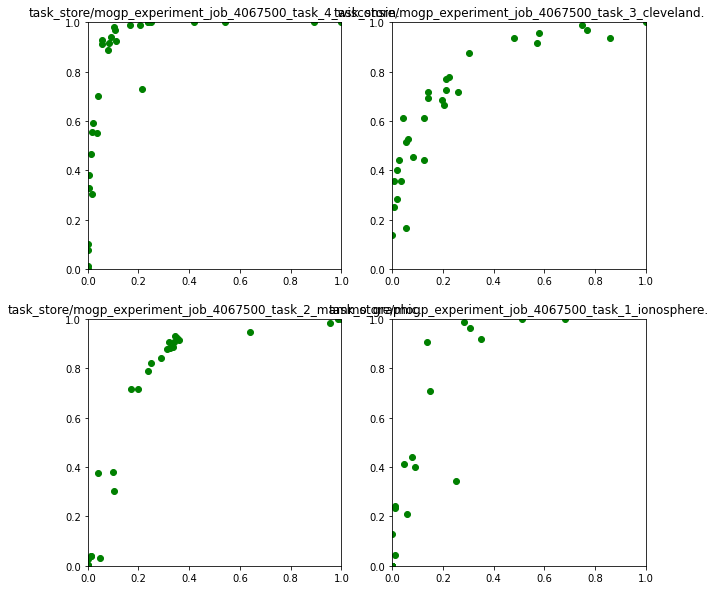

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    df = df.loc[df['training'] == True]
    ax.scatter(1 - df['full_tnr'].to_numpy(), df['full_tpr'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

### Test

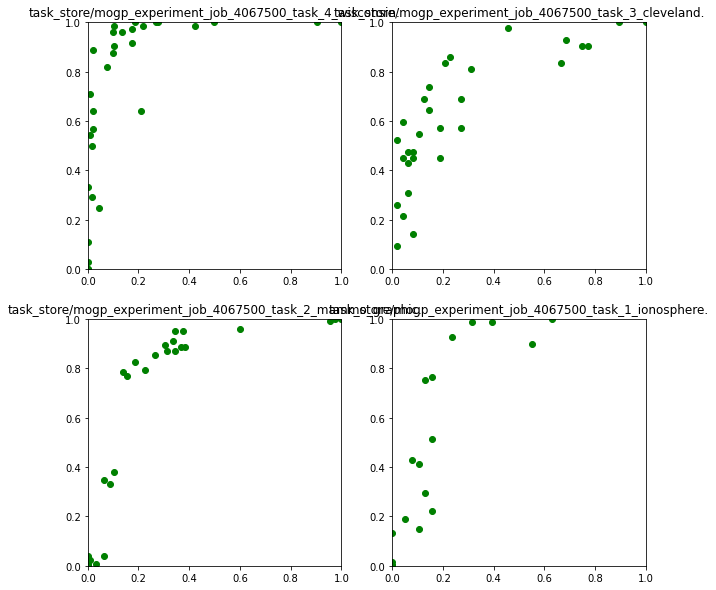

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    df = df.loc[df['training'] == False]
    ax.scatter(1 - df['full_tnr'].to_numpy(), df['full_tpr'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

# How long were run times?

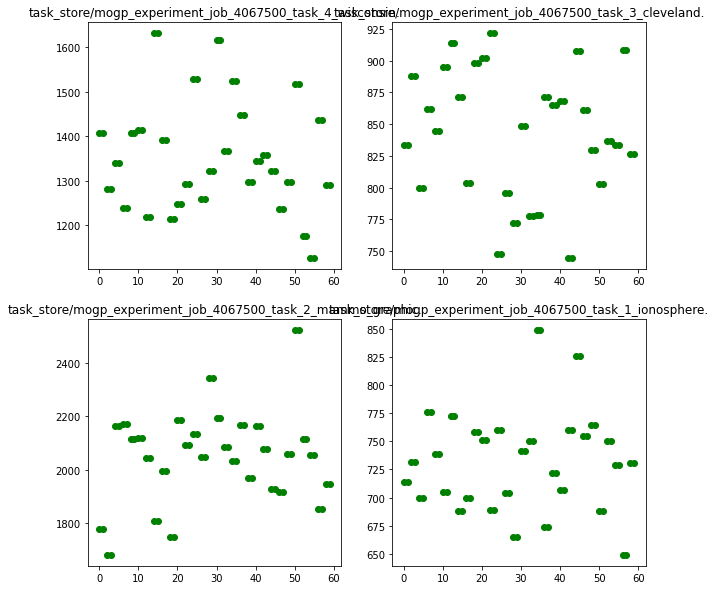

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    ax.scatter(np.arange(60), df['time'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))

# Code Architechture 

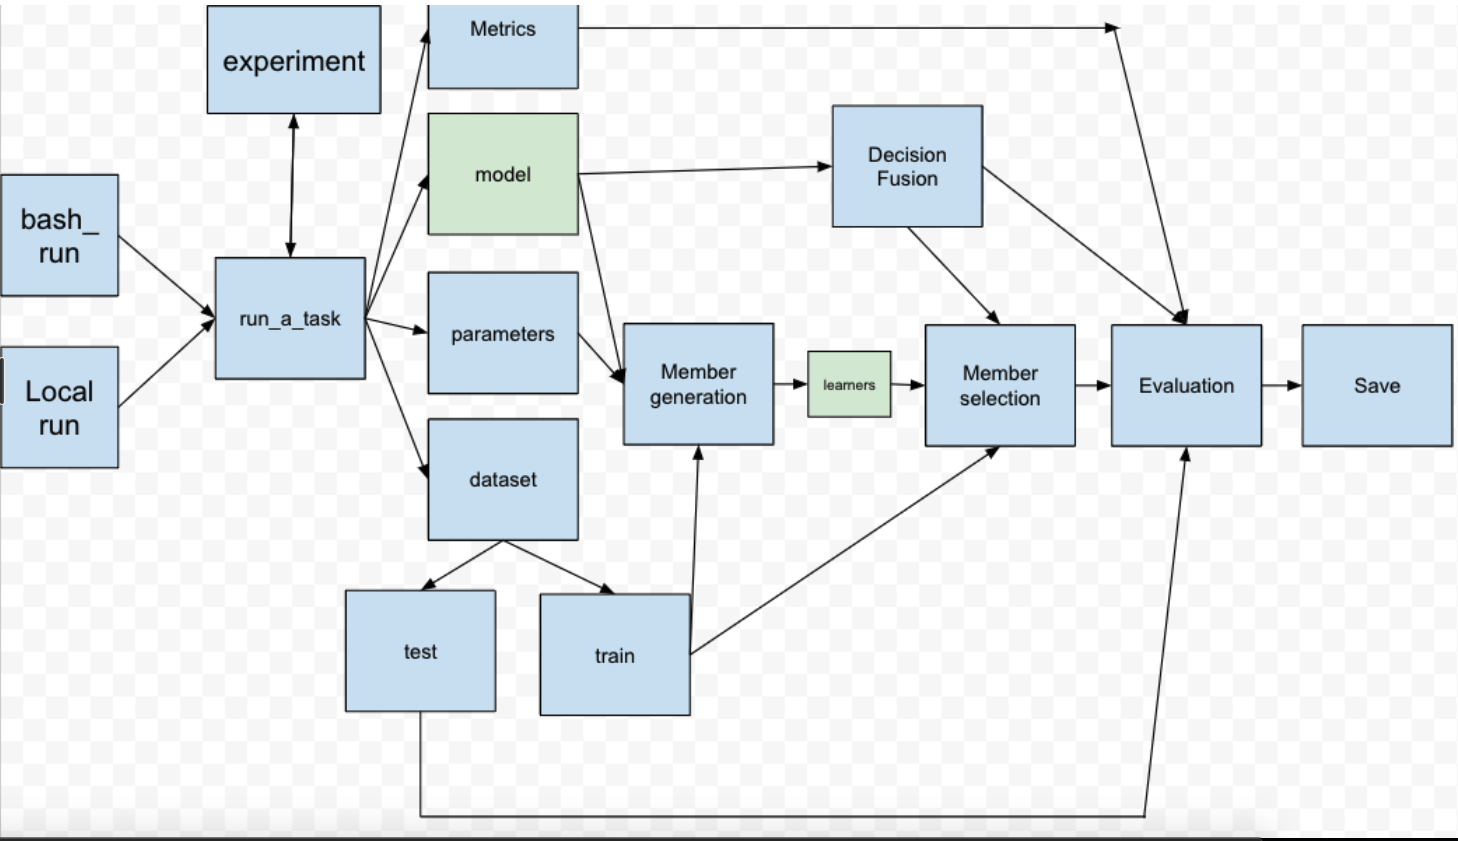

# Questions for the meeting.
- Based on this GP experiment, what ammendments need to be made? What visualisations should we aim for, learning curves, etc. 
    - More datasets?
- Things we try.
    - NEw objective function + full acc
    - New objective function + acc PER CLASS
  
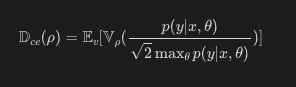

# MOGP results. Like to look at the results and version history

In [73]:
def df_avg_to_np(df):
    r = []
    for x in df['avg']:
        f1 = float(''.join(x.split()[0].replace('[','').split()))
        f2 = float(''.join(x.split()[1].replace(']','').split()))
        r.append([f1,f2])
    return np.array(r)
        

In [27]:
glb = glob.glob('task_store/*history*')
glb[0]

'task_store/history_21_mogp_experiment_job_4067500_task_3_cleveland.csv'

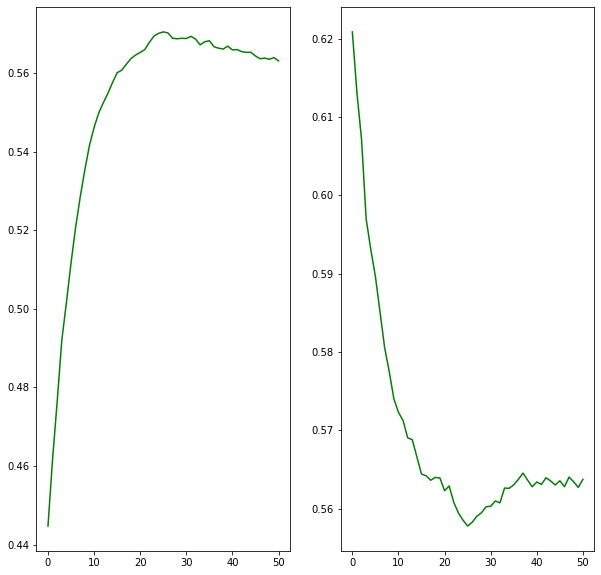

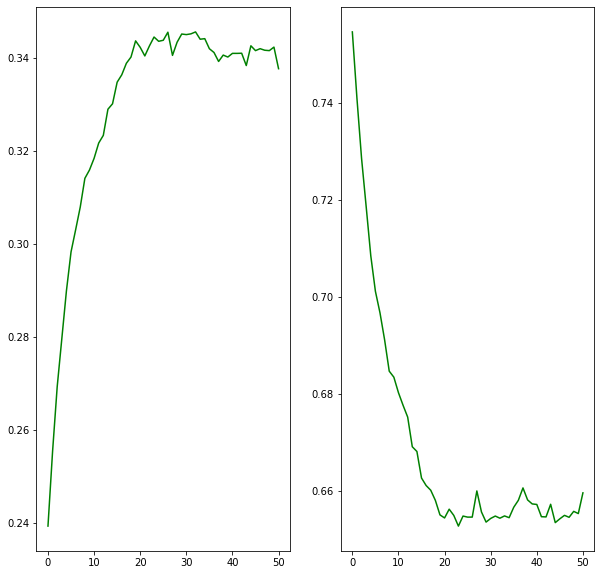

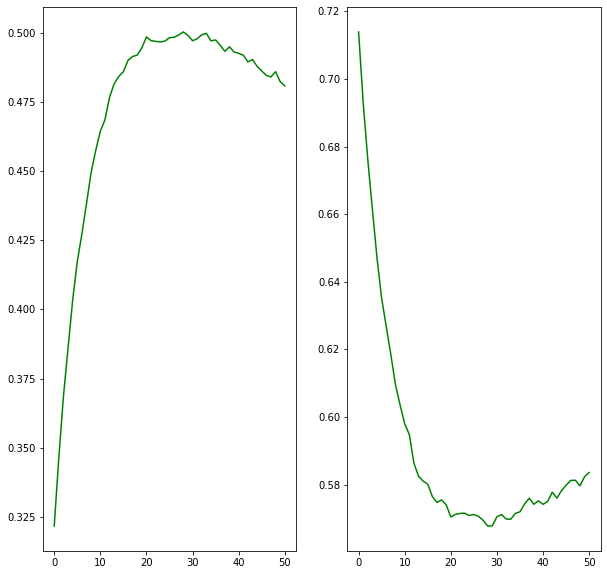

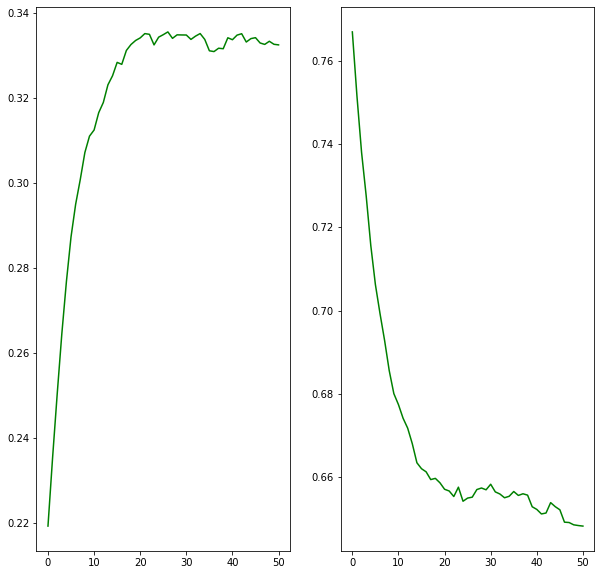

In [80]:
n_tasks = 4
for i in range(1,n_tasks+1,1): # for each task
    glb = glob.glob(f'task_store/history*task_{i}_*')  # collect all histories
    avgs = np.zeros((51,2))
    for gl in glb: # go through each history
        df = pd.read_csv(gl)
        avgs += df_avg_to_np(df)
    
    # average over generations 
    avgs = avgs / len(glb)

    # graph generations 
    fig, axs = plt.subplots(1, 2, figsize=(10,10))
    axs[0].plot(np.arange(avgs.shape[0]), avgs[:,0], color='green')
    axs[1].plot(np.arange(avgs.shape[0]), avgs[:,1], color='green')

